In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv
import re
import datetime
pd.set_option('display.max_columns', None)

# 1. Đọc dữ liệu từ file
Đọc từ file lên đã rồi làm gì thì làm :D 

In [2]:
user_df = pd.read_csv("data/user.csv")
playlist_df = pd.read_csv("data/playlist.csv")
track_df = pd.read_csv("data/track.csv")

In ra phần head của dữ liệu, lướt sơ qua và hiểu thông tin các cột.

In [3]:
user_df.head()

,avatar_url,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,description,followers_count,followings_count,first_name,full_name,groups_count,id,kind,last_modified,last_name,likes_count,playlist_likes_count,permalink,permalink_url,playlist_count,reposts_count,track_count,uri,urn,username,verified,visuals,badges,station_urn,station_permalink
0,https://i1.sndcdn.com/avatars-000012778523-59q...,Berlin,463,DE,2007-09-22T14:21:00Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Artist & Founder SoundCloud,133673,1270,Eric,Eric Wahlforss,0,183,user,2020-12-16T21:40:33Z,Wahlforss,306,10,forss,https://soundcloud.com/forss,4,NaN,26,https://api.soundcloud.com/users/183,soundcloud:users:183,Forss,True,"{'urn': 'soundcloud:users:183', 'enabled': Tru...","{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:183,artist-stations:183
1,https://i1.sndcdn.com/avatars-000000018772-c5d...,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Floor Limit is the music label in Japan.We hav...,265,5,Ark,Ark Kozuki,0,1691,user,2020-08-17T12:33:59Z,Kozuki,3,0,ark,https://soundcloud.com/ark,3,NaN,5,https://api.soundcloud.com/users/1691,soundcloud:users:1691,ark,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1691,artist-stations:1691
2,https://i1.sndcdn.com/avatars-000000018772-c5d...,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Floor Limit is the music label in Japan.We hav...,265,5,Ark,Ark Kozuki,0,1691,user,2020-08-17T12:33:59Z,Kozuki,3,0,ark,https://soundcloud.com/ark,3,NaN,5,https://api.soundcloud.com/users/1691,soundcloud:users:1691,ark,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1691,artist-stations:1691
3,https://i1.sndcdn.com/avatars-N3HNyXVCJnJ8YiLQ...,Tampere,241,FI,2008-04-19T17:43:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],{'product': {'id': 'creator-pro-unlimited'}},I <3 synths. 1/2 of U&K. Host of Etkoplasma ra...,1502,2002,Kim,Kim,0,2157,user,2021-08-17T10:55:32Z,NaN,826,54,kimik,https://soundcloud.com/kimik,5,NaN,73,https://api.soundcloud.com/users/2157,soundcloud:users:2157,Kimik,False,"{'urn': 'soundcloud:users:2157', 'enabled': Tr...","{'pro': False, 'pro_unlimited': True, 'verifie...",soundcloud:system-playlists:artist-stations:2157,artist-stations:2157
4,https://i1.sndcdn.com/avatars-000000012820-990...,NaN,0,NaN,2008-03-08T00:32:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Final Headphone Science album 'Frozen Love Amo...,877,6,NaN,NaN,0,1719,user,2017-09-07T21:15:46Z,NaN,1,0,headphonescience,https://soundcloud.com/headphonescience,4,NaN,46,https://api.soundcloud.com/users/1719,soundcloud:users:1719,Headphone Science,False,"{'urn': 'soundcloud:users:1719', 'enabled': Tr...","{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1719,artist-stations:1719


In [4]:
playlist_df.head()

,artwork_url,created_at,description,duration,embeddable_by,genre,id,kind,label_name,last_modified,license,likes_count,managed_by_feeds,permalink,permalink_url,public,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,tag_list,title,uri,user_id,set_type,is_album,published_at,display_date,user,tracks,track_count
0,https://i1.sndcdn.com/artworks-000067273270-ui...,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,all,Electronic,18,playlist,sonarkollektiv,2021-07-21T10:53:42Z,all-rights-reserved,1544,False,soulhack,https://soundcloud.com/forss/sets/soulhack,True,NaN,http://www.sonarkollektiv.com/releases/SK006CD,2003-06-02T00:00:00Z,262,NaN,public,downtempo sampling beats,Soulhack,https://api.soundcloud.com/playlists/18,183,album,True,NaN,2008-04-30T01:21:15Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,11
1,NaN,2008-05-01T04:12:43Z,artist / noe\r\n,354742,all,ambient pop,32,playlist,Floor Limit,2015-10-13T13:39:25Z,all-rights-reserved,2,False,noe,https://soundcloud.com/ark/sets/noe,True,NaN,http://www.amazon.co.jp/beautiful-world-noe/dp...,2005-07-30T00:00:00Z,0,NaN,public,"ambient electronica IDM electropop japan ""girl...",noe - a beautiful world,https://api.soundcloud.com/playlists/32,1691,album,True,NaN,2008-05-01T04:12:43Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[],0
2,NaN,2008-05-01T04:13:55Z,NaN,254066,all,abstract hip-hop,33,playlist,Floor Limit,2015-10-13T13:35:10Z,all-rights-reserved,1,False,akt-the-jn,https://soundcloud.com/ark/sets/akt-the-jn,True,NaN,NaN,2005-06-29T00:00:00Z,0,NaN,public,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,https://api.soundcloud.com/playlists/33,1691,album,True,NaN,2008-05-01T04:13:55Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,"[{'artwork_url': None, 'caption': None, 'comme...",1
3,NaN,2008-05-01T17:31:06Z,NaN,50620378,all,NaN,34,playlist,NaN,2021-10-16T14:55:49Z,all-rights-reserved,1,False,dj-mixes,https://soundcloud.com/kimik/sets/dj-mixes,True,NaN,NaN,NaN,0,NaN,public,NaN,Dj Mixes,https://api.soundcloud.com/playlists/34,2157,NaN,False,NaN,2008-05-01T17:31:06Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,10
4,NaN,2008-05-05T03:06:57Z,songs i made for a rave i played at in 2007,2498158,all,smoke & chill,38,playlist,NaN,2015-10-13T13:39:25Z,all-rights-reserved,3,False,the-rave-songs,https://soundcloud.com/headphonescience/sets/t...,True,NaN,NaN,2007-01-01T00:00:00Z,1,NaN,public,NaN,the rave songs,https://api.soundcloud.com/playlists/38,1719,ep,True,NaN,2008-05-05T03:06:57Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,"[{'artwork_url': None, 'caption': None, 'comme...",4


In [5]:
track_df.head()

,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,id,kind,label_name,last_modified,license,likes_count,permalink,permalink_url,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,title,track_format,uri,urn,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy,user
0,https://i1.sndcdn.com/artworks-000067273298-mj...,NaN,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,290,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,city-ports,https://soundcloud.com/forss/city-ports,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,NaN,public,finished,True,cinematic intro,City Ports,single-track,https://api.soundcloud.com/tracks/290,soundcloud:tracks:290,183,NaN,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
1,https://i1.sndcdn.com/artworks-000067273301-we...,NaN,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,291,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,soulhack,https://soundcloud.com/forss/soulhack,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,NaN,public,finished,True,jazz,Soulhack,single-track,https://api.soundcloud.com/tracks/291,soundcloud:tracks:291,183,NaN,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
2,https://i1.sndcdn.com/artworks-000067273305-sn...,NaN,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,292,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,funk-for-nerds,https://soundcloud.com/forss/funk-for-nerds,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,NaN,public,finished,True,jazz,Funk for Nerds,single-track,https://api.soundcloud.com/tracks/292,soundcloud:tracks:292,183,NaN,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
3,https://i1.sndcdn.com/artworks-000067273316-sm...,NaN,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,293,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,flickermood,https://soundcloud.com/forss/flickermood,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,NaN,public,finished,True,downtempo,Flickermood,single-track,https://api.soundcloud.com/tracks/293,soundcloud:tracks:293,183,NaN,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.

Ta thấy rằng cột đầu tiên chứa url dẫn tới hình ảnh avatar, artwork,... là không cần thiết trong việc phân tích dữ liệu (trừ khi ta phân tích dữ liệu ảnh, điều mà sẽ không diễn ra trong đồ án này).  
Vì vậy, phần cột dữ liệu ấy sẽ được bỏ đi đầu tiên.
**Lưu ý : chỉ chạy ô bên dưới 1 lần duy nhất, vì khi chạy lần thứ 2, cột cần xóa sẽ không tồn tại trong dataframe nữa, khi đó hàm xóa không tìm thấy cốt cần xóa sẽ báo lỗi**

In [6]:
try:
    track_df = track_df.drop(columns=['artwork_url'])
except:
    pass
try:
    user_df = user_df.drop(columns=['avatar_url'])
except:
    pass
try:
    playlist_df = playlist_df.drop(columns=['artwork_url'])
except:
    pass

Điểm qua xem có bao nhiều dòng ở mỗi tập dữ liệu :

In [7]:
print("Số dòng của track : {}".format(len(track_df)))
print("Số dòng của play list : {}".format(len(playlist_df)))
print("Số dòng của user : {}".format(len(user_df)))

Số dòng của track : 4854
Số dòng của play list : 1011
Số dòng của user : 1011


# 2. Xác định cột khóa chính, loại bỏ cột không cần thiết và loại bỏ dòng trùng
Để loại bỏ những dòng bị trùng, đầu tiên ta phải xác định cột ID/khóa chính (cột định danh của mỗi bảng dữ liệu), vì đó là cơ sở để xem xét các dòng có bị trùng không.

## 2.1. Tập dữ liệu user
- Với tập dữ liệu user, ta thấy có 3 trường là `uri`,`urn`,`username`,`permalink_url`,`id` là ba cột nếu xét trên ý nghĩa thực tế là ba cột khóa chính (tức mỗi record sẽ có 1 giá trị phân biệt ở cột này).Ba cột đều có thể trở thành khóa chính.  
- Tuy nhiên, khi xét trên công việc phân tích dữ liệu, cột `uri` và `urn` không mang ý nghĩa lắm vì 2 trường đó là url của API.  
- Cột `permalink_url` là cột có thể suy ra từ `username`, hay nói cách khác từ `username` có thể suy dẫn ra `permalink_url`, điều này sẽ khiến cho thông tin bị trùng lắp, dư thừa và không hiệu quả khi đưa vào mô hình để phân tích dữ liệu. Thực tế, ta có thể phát hiện việc này qua mô hình xác suất (ở đây ta phát hiện bằng cách dò bằng mắt). Tuy nhiên, độ lớn của đồ án chưa đủ để chúng ta cần dùng đến mô hình ấy :).  
- Cột `user_name` có vẻ cần thiết. Tuy nhiên, khi phân tích dữ liệu, khóa chính cần phải càng đơn giản càng tốt. Rõ ràng, `user_name` so với `id` thì không thể bằng trong việc định tính đối tượng/record. Về mặt thông tin, `user_name` cũng không thể so với cột `full_name` vì rõ ràng `full_name` cho cả họ lẫn tên, còn username chỉ là biệt danh, sẽ phân tích được gì từ dữ liêu biệt danh của người dùng chứ? Qua phân tích này, ta thấy cột `first_name` cũng khá thừa thãi nên sẽ loại bỏ nó luôn.
- Những cột như : `station_urn`, `station_permalink` đều suy ra được từ `id`
Vì vậy, ta để lại `id` làm khóa chính.

In [8]:
user_df = user_df.drop(columns=['uri','urn','permalink_url','station_permalink','permalink','username','station_urn'])

- Sau đó, ta tiến hành loại bỏ dòng trùng dựa vào cột `id`.
- Trước đó bảng user có 1011 dòng. 
- Ta sẽ xem xét sau khi loại bỏ dòng trùng dựa vào id thì còn bao nhiêu.
- Ngoài ra, ta sẽ so sánh khi loại bỏ dòng trùng khi dựa vào `id` với khi loại bỏ dòng trùng dựa vào dữ liệu của nguyên cột (tức tất cả các cột giống nhau hết mới xem là trùng) xem nhận xét `id` là khóa chính có đúng không.


In [9]:
print("Loại bỏ dòng trùng dựa vào cả dòng : {}".format(len(user_df.drop_duplicates())))
user_df = user_df.drop_duplicates(subset=['id'])
print("Loại bỏ dòng rùng dựa vào cột id :{}".format(len(user_df)))

Loại bỏ dòng trùng dựa vào cả dòng : 694
Loại bỏ dòng rùng dựa vào cột id :694


Như đã thấy, dòng `id` chính xác là khóa chính chúng ta cần tìm. Ta sẽ cho cột `id` index column trong dataframe để dễ xử lý cho các bước sau.

In [10]:
user_df =user_df.set_index('id')

## 2.2. Tập dữ liệu play list

Giống như khi làm với tập user, chúng ta cũng sẽ loại bỏ những dòng unique nhưng không cung cấp thông tin cần thiết cho việc phân tích dữ liệu.
- `id` : Đầu tiên, ta thấy cột `id` làm rất tốt việc định danh từng record một cách đơn giản là đánh số.
- `permalink`,`user`,`permalink_url` : Có thể cung cấp thông tin về user và định danh track. Tuy vậy, ta có thể dùng cột `user_id` để cung cấp thông tin về user sở hữu track hiệu quả hơn.
- `uri`:định danh không tốt bằng `id`
Bước cho cột `id` là khóa chính thực hiện giống như mục 2.1.

In [11]:
playlist_df = playlist_df.drop(columns = ['permalink','permalink_url','permalink','user','uri'])

In [12]:
print("Xóa cột trùng theo dòng : {}".format(len(playlist_df.drop_duplicates())))
playlist_df = playlist_df.drop_duplicates(['id'])
print("Xóa cột trùng theo id : {}".format(len(playlist_df)))
playlist_df = playlist_df.set_index('id')


Xóa cột trùng theo dòng : 1011
Xóa cột trùng theo id : 1011


## 2.3 Tập dữ liệu Track
Sẽ có 3 cột được loại bỏ:
- `permalink`,`permalink_url`,`uri`,`urn`,`user` : giống như những mục trên
Cột đưa ra lựa chọn khó nhất chính là `publisher_metadata` bởi ta không biết liệu ở công đoạn sau, người xử lý có cần những dữ liệu thể hiện các mối quan hệ giữa publisher và bài hát hay không. Cho nên quyết định cuối cùng là giữ lại cho chắc. 

In [13]:
track_df = track_df.drop(columns=['permalink','permalink_url','uri','urn','user'])

In [14]:
print("Xóa cột trùng theo dòng : {}".format(len(track_df.drop_duplicates())))
track_df = track_df.drop_duplicates(['id'])
print("Xóa cột trùng theo id : {}".format(len(track_df)))
track_df.set_index('id')

Xóa cột trùng theo dòng : 4732
Xóa cột trùng theo id : 4732


,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,kind,label_name,last_modified,license,likes_count,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,title,track_format,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
290,NaN,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,NaN,public,finished,True,cinematic intro,City Ports,single-track,183,NaN,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
291,NaN,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,NaN,public,finished,True,jazz,Soulhack,single-track,183,NaN,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
292,NaN,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,NaN,public,finished,True,jazz,Funk for Nerds,single-track,183,NaN,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
293,NaN,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,NaN,public,finished,True,downtempo,Flickermood,single-track,183,NaN,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
294,NaN,True,31.0,2007-09-22T15:00:17Z,From the Soulhack album,True,3134.0,291395,291395,all,Electronic,False,track,sonarkollektiv,2019-06-12T15:07:06Z,all-rights-reserved,261.0,202039.0,True,"{'id': 294, 'urn': 'soundcloud:tracks:294', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00002,2003-06-02T00:00:00Z,23,NaN,public,finished,True,samples,Using Splashes,single-track,183,NaN,https://wave.sndcdn.com/hrNkZJd9Tjx4_m.json,2007-09-22T15:00:17Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:294,track-stations:294,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111915,NaN,True,0.0,2009-01-14T23:45:40Z

Như vậy, ta giảm được xấp xỉ 100 dòng so với ban đầu.

# 3. Xử lý giá trị thiếu
Với những cột thiếu dữ liệu, ta có hai hướng xử lý : 
- Hoặc bỏ cột ấy đi
- Hoặc xây dựng một mô hình suy diễn điền vào các gía trị thiếu. 
 
Với những cột có dữ liệu thiếu quá nhiều, vượt ngưỡng 50%, thì việc điền vào các giá trị thiếu bằng mô hình có thể sẽ không chính xác, ảnh hưởng đến các bước phân tích về sau nghiêm trọng.
Vì vậy, những cột có giá trị thiếu >50% đều sẽ bị loại bỏ!

In [15]:
percent = 50.0
min_count = int((100-percent)/100*playlist_df.shape[0]+1)
playlist_df = playlist_df.dropna(axis=1,thresh=min_count)
track_df = track_df.dropna(axis=1,thresh=min_count)
user_df = user_df.dropna(axis=1,thresh=min_count)

# 4. Chuyển đổi dữ liệu về kiểu phù hợp

## 4.1 Dữ liệu user
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `user`

In [16]:
print(user_df.dtypes)
user_df.head()

city                     object
comments_count            int64
country_code             object
created_at               object
creator_subscriptions    object
creator_subscription     object
followers_count           int64
followings_count          int64
groups_count              int64
kind                     object
last_modified            object
likes_count               int64
playlist_likes_count      int64
playlist_count            int64
track_count               int64
verified                   bool
badges                   object
dtype: object


,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,followers_count,followings_count,groups_count,kind,last_modified,likes_count,playlist_likes_count,playlist_count,track_count,verified,badges
id,,,,,,,,,,,,,,,,,
183,Berlin,463,DE,2007-09-22T14:21:00Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},133673,1270,0,user,2020-12-16T21:40:33Z,306,10,4,26,True,"{'pro': False, 'pro_unlimited': False, 'verifi..."
1691,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},265,5,0,user,2020-08-17T12:33:59Z,3,0,3,5,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2157,Tampere,241,FI,2008-04-19T17:43:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],{'product': {'id': 'creator-pro-unlimited'}},1502,2002,0,user,2021-08-17T10:55:32Z,826,54,5,73,False,"{'pro': False, 'pro_unlimited': True, 'verifie..."
1719,NaN,0,NaN,2008-03-08T00:32:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},877,6,0,user,2017-09-07T21:15:46Z,1,0,4,46,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2455,Borlänge,9,SE,2008-05-14T19:44:36Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},209,46,0,user,2015-10-18T13:05:36Z,33,5,4,29,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."


Ta nhận thấy dữ liệu cột `create_at`,`last_modified` có định dạng ngày tháng năm nhưng được biểu diễn dưới dạng object

In [17]:
user_df['created_at'] = pd.to_datetime(user_df['created_at'])
user_df['last_modified'] = pd.to_datetime(user_df['last_modified'])

## 4.2 Dữ liệu playlist
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `playlist`

In [18]:
print(playlist_df.dtypes)
playlist_df.head()

created_at          object
description         object
duration             int64
embeddable_by       object
kind                object
last_modified       object
license             object
likes_count          int64
managed_by_feeds      bool
public                bool
reposts_count        int64
sharing             object
title               object
user_id              int64
is_album              bool
display_date        object
tracks              object
track_count          int64
dtype: object


,created_at,description,duration,embeddable_by,kind,last_modified,license,likes_count,managed_by_feeds,public,reposts_count,sharing,title,user_id,is_album,display_date,tracks,track_count
id,,,,,,,,,,,,,,,,,,
18,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,all,playlist,2021-07-21T10:53:42Z,all-rights-reserved,1544,False,True,262,public,Soulhack,183,True,2008-04-30T01:21:15Z,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,11
32,2008-05-01T04:12:43Z,artist / noe\r\n,354742,all,playlist,2015-10-13T13:39:25Z,all-rights-reserved,2,False,True,0,public,noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,[],0
33,2008-05-01T04:13:55Z,NaN,254066,all,playlist,2015-10-13T13:35:10Z,all-rights-reserved,1,False,True,0,public,AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,"[{'artwork_url': None, 'caption': None, 'comme...",1
34,2008-05-01T17:31:06Z,NaN,50620378,all,playlist,2021-10-16T14:55:49Z,all-rights-reserved,1,False,True,0,public,Dj Mixes,2157,False,2008-05-01T17:31:06Z,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,10
38,2008-05-05T03:06:57Z,songs i made for a rave i played at in 2007,2498158,all,playlist,2015-10-13T13:39:25Z,all-rights-reserved,3,False,True,1,public,the rave songs,1719,True,2008-05-05T03:06:57Z,"[{'artwork_url': None, 'caption': None, 'comme...",4


Ta thấy các cột `created_at`,`last_modified`,`display_date` cần được chuyển sang định dạng ngày tháng năm để dễ xử lý

In [19]:
playlist_df['created_at'] = pd.to_datetime(playlist_df['created_at'])
playlist_df['last_modified'] = pd.to_datetime(playlist_df['last_modified'])
playlist_df['display_date'] = pd.to_datetime(playlist_df['display_date'])

## 4.3 Dữ liệu track
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `track`

In [20]:
print(track_df.dtypes)
track_df.head()

commentable               bool
comment_count          float64
created_at              object
description             object
downloadable              bool
download_count         float64
duration                 int64
full_duration            int64
embeddable_by           object
genre                   object
has_downloads_left        bool
id                       int64
kind                    object
label_name              object
last_modified           object
license                 object
likes_count            float64
playback_count         float64
public                    bool
publisher_metadata      object
purchase_url            object
release_date            object
reposts_count            int64
sharing                 object
state                   object
streamable                bool
tag_list                object
title                   object
track_format            object
user_id                  int64
waveform_url            object
display_date            object
media   

,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,id,kind,label_name,last_modified,license,likes_count,playback_count,public,publisher_metadata,purchase_url,release_date,reposts_count,sharing,state,streamable,tag_list,title,track_format,user_id,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy
0,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,290,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,public,finished,True,cinematic intro,City Ports,single-track,183,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
1,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,291,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,public,finished,True,jazz,Soulhack,single-track,183,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
2,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,292,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,public,finished,True,jazz,Funk for Nerds,single-track,183,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
3,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,293,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,public,finished,True,downtempo,Flickermood,single-track,183,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
4,True,31.0,2007-09-22T15:00:17Z,From the Soulhack album,True,3134.0,291395,291395,all,Electronic,False,294,track,sonarkollektiv,2019-06-12T15:07:06Z,all-rights-reserved,261.0,202039.0,True,"{'id': 294, 'urn': 'soundcloud:tracks:294', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00002,2003-06-02T00:00:00Z,23,public,finished,True,samples,Using Splashes,single-track,183,https://wave.sndcdn.com/hrNkZJd9Tjx4_m.json,2007-09-22T15:00:17Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:294,track-stations:294,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW


Có 2 vấn đề cần xử lý ở dữ liệu `user` : 
- Chuyển các cột `created_at`,`release_date` và `last_modified` sang dạng ngày tháng năm.
- Chuyển các cột có đáng ra có dữ liệu int nhưng lại mang dữ liệu float

In [21]:
# chuyển ngày làm tương tự như 2 tập dữ liệu trên
track_df['created_at'] = pd.to_datetime(track_df['created_at'])
track_df['last_modified'] = pd.to_datetime(track_df['last_modified'])
track_df['release_date'] = pd.to_datetime(track_df['release_date'])
track_df['display_date'] = pd.to_datetime(track_df['display_date'])

Xem các cột có dữ liệu float

In [22]:
dtypes = track_df.dtypes
dtypes
float_cols = (dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
float_cols
# track_cols_float = set(track_dypte[(track_dypte==np.float_)])
# track_cols_float

Index(['comment_count', 'download_count', 'likes_count', 'playback_count'], dtype='object')

Ta thấy các dữ liệu này đều là biến đếm (đếm số lượng download, comment) và phải mang kiểu dữ liệu là Int. Tuy nhiên các biến này lại mang dữ liệu float, sẽ gây khó khăn khi thực hiện phân tích dữ liệu. Vì vậy ta sẽ chuyển chúng sang Int.

In [23]:
track_df[float_cols] = track_df[float_cols].astype('Int64')

In [24]:
user_df.shape

(694, 17)

In [25]:
playlist_df.shape

(1011, 18)

In [26]:
track_df.shape

(4732, 38)

# Phân tích, khám phá dữ liệu

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
mpl.style.use('seaborn')

## 3.1 Tập user:

Đầu tiên ta sẽ xem qua sự tương quan giữa các biến có kiểu số trong tập user. Biến càng tương quan mạnh thì càng gần 1 hoặc -1. Ngược lại tương quan càng yếu khi càng gần bằng 0.

In [29]:
user_df.corr()

,comments_count,followers_count,followings_count,groups_count,likes_count,playlist_likes_count,playlist_count,track_count,verified
comments_count,1.000000,0.159917,0.445028,NaN,0.459021,0.356824,0.204961,0.294313,0.293622
followers_count,0.159917,1.000000,0.111589,NaN,0.049477,0.122009,0.281718,0.359868,0.546719
followings_count,0.445028,0.111589,1.000000,NaN,0.417668,0.409291,0.189312,0.208921,0.154222
groups_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes_count,0.459021,0.049477,0.417668,NaN,1.000000,0.686713,0.166473,0.120604,0.091077
playlist_likes_count,0.356824,0.122009,0.409291,NaN,0.686713,1.000000,0.370068,0.388574,0.184838
playlist_count,0.204961,0.281718,0.189312,NaN,0.166473,0.370068,1.000000,0.716062,0.424584
track_count,0.294313,0.359868,0.208921,NaN,0.120604,0.388574,0.716062,1.000000,0.543542
verified,0.293622,0.546719,0.154222,NaN,0.091077,0.184838,0.424584,0.543542,1.000000


Ta có thể thấy 1 số cặp biến có tương quan mạnh với nhau như là:
- likes_count và playlist_likes_count (0.68)
- playlist_count và track_count (0.71)
- track_count và verified (0.54)
- followers_count và verified (0.54)

Để hiểu rõ hơn về mối quan hệ tuyến tính giữa 2 biến, ta có thể dùng regplot để vẽ biểu đồ phân tán và đường hồi quy tuyến tính phù hợp với dữ liệu.
Ở đây ta sẽ xem thử quan hệ giữa "likes_count" và "comments_count" để biết số lượt comments tương quan thế nào với số lượt like

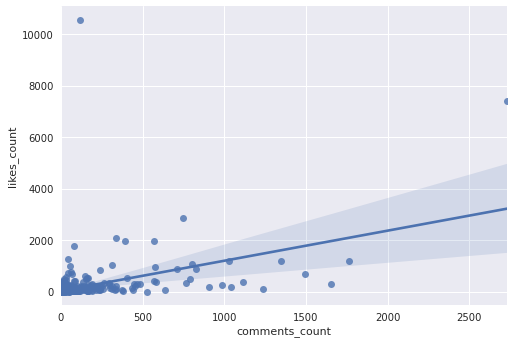

In [30]:
sns.regplot(x="comments_count",y="likes_count",data=user_df);

Nhìn hình, ta thấy có vẻ như khi comments_count tăng thì likes_count cũng sẽ tăng lên nhẹ. Điều này chỉ ra rằng 2 cột này có quan hệ đồng biến

Bây giờ hãy dùng bar plot và pie charts để xem thử 10 quốc gia có tổng số followers nhiều nhất là các nước nào.

In [31]:
user_df_groupbycountry=user_df.groupby("country_code",axis=0).sum()
user_df_groupbycountry.sort_values(by="followers_count",ascending=False,axis=0,inplace=True)
user_df_groupbycountry=user_df_groupbycountry.head(10)
user_df_groupbycountry=user_df_groupbycountry["followers_count"]

- Dùng bar plot

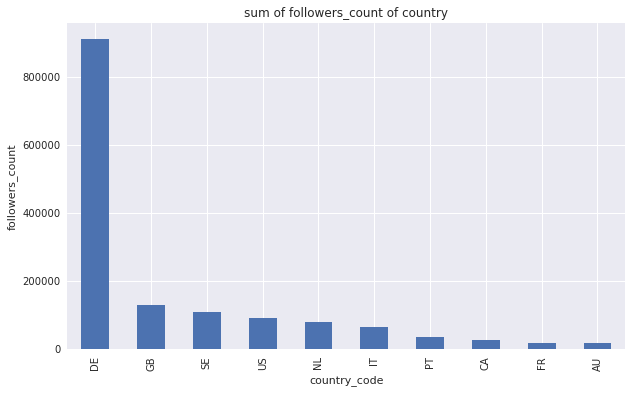

In [32]:
user_df_groupbycountry.plot(kind='bar',figsize=(10,6))
plt.ylabel("followers_count")
plt.title("sum of followers_count of country");

- Dùng pie charts

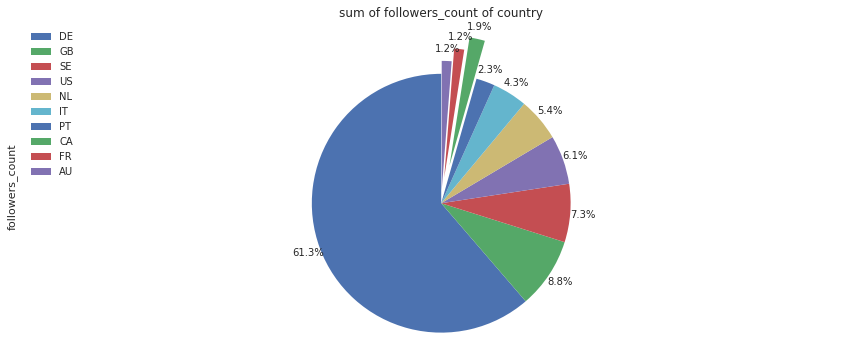

In [33]:
explode_list=[0,0,0,0,0,0,0,0.3,0.2,0.1]
user_df_groupbycountry.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1,explode=explode_list)
plt.title("sum of followers_count of country")
plt.axis('equal')
plt.legend(labels=user_df_groupbycountry.index,loc='upper left');

Qua 2 hình trên, ta có thể thấy Đức(DE) là quốc gia có lượng followers nhiều nhất, chênh lệch rất lớn so với các nước xếp sau như: Vương Quốc Anh(GB), Thụy Điển(SE), hay Mỹ(US)

Tiếp theo hãy dùng histogram plot để xem tần suất của số followers

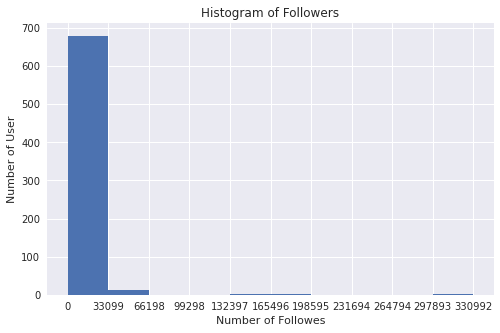

In [34]:
count_fol, bin_edges_fol = np.histogram(user_df["followers_count"])
user_df["followers_count"].plot(kind='hist', figsize=(8, 5), xticks=bin_edges_fol)
plt.title('Histogram of Followers')
plt.ylabel('Number of User')
plt.xlabel('Number of Followes');

Có thể thấy rằng đa số user có từ 0 đến 33099 followers (gần 700 user). Và rất ít user có từ 33099 followers trở lên.

Giờ hãy xem thử sự phân phối của số lượng bình luận (comments_count) mỗi user là như thế nào bằng distplot

/home/namdoanviet/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


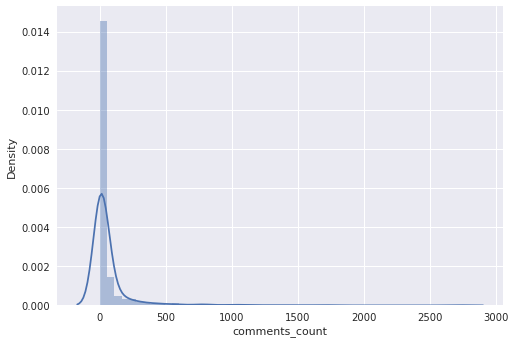

In [35]:
sns.distplot(user_df["comments_count"]);

Ta thấy rằng số lượng comments_count của mỗi user đa số là bằng 0 và gần như không có user nào có trên 500 bình luận => Âm nhạc là để thưởng thức chứ không phải để tranh luận :D

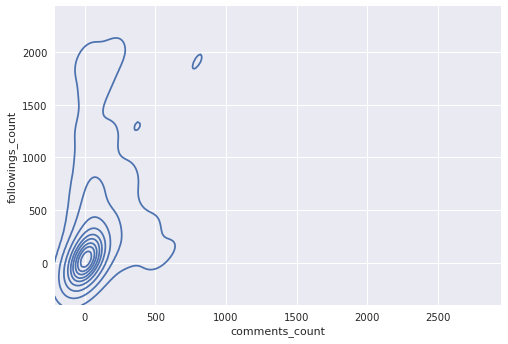

In [36]:
sns.kdeplot(data=user_df,x="comments_count",y="followings_count");

Nhìn hình có thể thấy rằng số lượt comment và số lượt theo dõi các user khác của mỗi user hầu như rất ít (chủ yếu từ 0 cho đến dưới 500). Followings_count thì có xu hướng là cao hơn comments_count.

## 3.2 Tập playlist:

Tương tự như 2 tập trên, đầu tiên ta sẽ xem qua sự tương quan giữa tất cả các biến của tập playlist bằng correlation matrix.

In [37]:
playlist_df.corr()

,duration,likes_count,managed_by_feeds,public,reposts_count,user_id,is_album,track_count
duration,1.000000,0.276169,NaN,NaN,0.306539,-0.092020,-0.068717,0.520669
likes_count,0.276169,1.000000,NaN,NaN,0.991665,-0.076187,0.050433,0.236462
managed_by_feeds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reposts_count,0.306539,0.991665,NaN,NaN,1.000000,-0.073226,0.043970,0.246844
user_id,-0.092020,-0.076187,NaN,NaN,-0.073226,1.000000,-0.086396,-0.211624
is_album,-0.068717,0.050433,NaN,NaN,0.043970,-0.086396,1.000000,0.058054
track_count,0.520669,0.236462,NaN,NaN,0.246844,-0.211624,0.058054,1.000000


Ta có thể biểu diễn rõ hơn sự tương quan của các biến trên bằng heat map.

<AxesSubplot:>

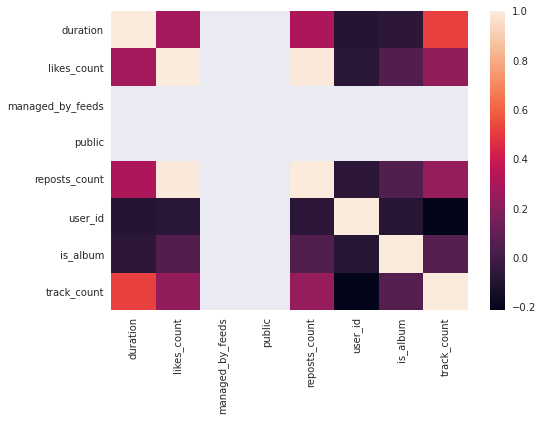

In [38]:
sns.heatmap(playlist_df.corr())

Nhìn các hình trên ta thấy có 2 cặp biến là có sự tương quan cao với nhau là:
- reposts_count và likes_count(0.99)
- track_count và duration (0.52)

Để quan sát rõ hơn sự tương quan giữa 2 biến reposts_count và likes_count ta có thể biểu diễn bằng regplot

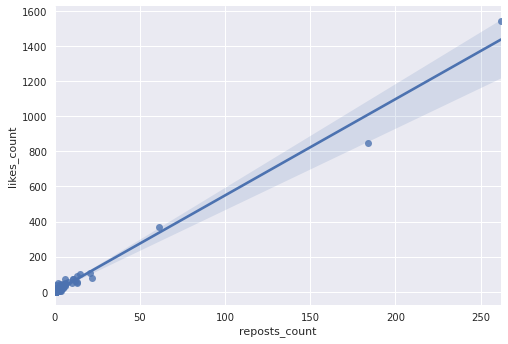

In [39]:
sns.regplot(x="reposts_count",y="likes_count",data=playlist_df);

Ta có thể thấy rõ sự tương quan rất cao của 2 biến này, không chênh nhiều so với đường dự đoán

Giờ hãy xem thử sự phân bố số lượt like của các playlist.

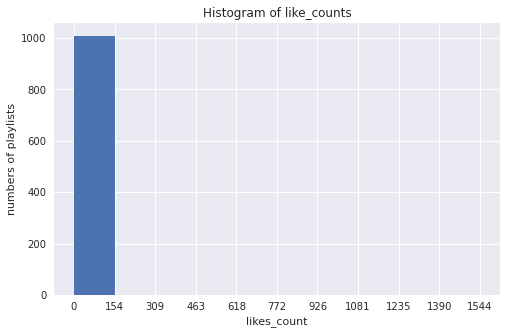

In [40]:
# sns.histplot(x="likes_count",data=playlist_df)
count_likes, bin_edges_likes = np.histogram(playlist_df["likes_count"])
playlist_df["likes_count"].plot(kind='hist',figsize=(8,5), xticks=bin_edges_likes)
plt.title("Histogram of like_counts")
plt.xlabel("likes_count")
plt.ylabel("numbers of playlists");

Ta có thể thấy rằng gần như tất cả các playlists đều có dưới 154 likes

## 3.3, Tập track:

Đầu tiên chúng ta cũng nên xem qua sự tương quan giữa các biến như tập user.

In [41]:
track_df.corr()

,commentable,comment_count,downloadable,download_count,duration,full_duration,has_downloads_left,id,likes_count,playback_count,public,reposts_count,streamable,user_id
commentable,1.000000,NaN,-0.018580,-0.015446,-0.019685,-0.019685,-0.021530,-0.012356,-0.005026,-0.000569,NaN,-0.011337,-0.001769,0.001263
comment_count,NaN,1.000000,-0.008944,0.448514,0.203002,0.203002,-0.051505,0.094702,0.417023,0.469641,NaN,0.457363,0.012223,0.043730
downloadable,-0.018580,-0.008944,1.000000,0.157498,0.225300,0.225300,0.863003,-0.057661,-0.024569,-0.007683,NaN,-0.021842,0.037063,-0.037465
download_count,-0.015446,0.448514,0.157498,1.000000,0.154622,0.154622,0.046919,-0.018875,0.048255,0.156888,NaN,0.062900,0.015218,-0.009190
duration,-0.019685,0.203002,0.225300,0.154622,1.000000,1.000000,0.183752,0.327225,0.025052,-0.001589,NaN,0.046582,0.037910,0.230483
full_duration,-0.019685,0.203002,0.225300,0.154622,1.000000,1.000000,0.183752,0.327225,0.025052,-0.001589,NaN,0.046582,0.037910,0.230483
has_downloads_left,-0.021530,-0.051505,0.863003,0.046919,0.183752,0.183752,1.000000,-0.026012,-0.026702,-0.025318,NaN,-0.024763,0.028927,-0.030948
id,-0.012356,0.094702,-0.057661,-0.018875,0.327225,0.327225,-0.026012,1.000000,0.026851,-0.003933,NaN,0.055656,0.041929,0.367055
likes_count,-0.005026,0.417023,-0.024569,0.048255,0.025052,0.025052,-0.026702,0.026851,1.000000,0.950808,NaN,0.988809,0.006124,0.006818
playback_count,-0.000569,0.469641,-0.007683,0.156888,-0.001589,-0.001589,-0.025318,-0.003933,0.950808,1.000000,NaN,0.932952,0.006357,-0.002440


Nhìn hình này ta có thể thấy các cặp biến có sự tương quan cao với nhau như là:
- reposts_count và likes_counts(0.98)
- playback_count và likes_counts(0.95)
- reposts_count và playback_count(0.93)
- downloadable và hasdownloads_left (0.86)
- duration và full_duration (1)

Ta sẽ xem rõ hơn sự tương quan giữa số lượt nghe lại (playback_count) với số lượt thích (likes_count) của track đó bằng scatterplot.

Đầu tiên ta loại bỏ những dòng thiếu giá trị ở cột likes_count

In [42]:
track_df_likes_playback=track_df[~track_df["likes_count"].isna()]

Tiếp đến ta cần loại bỏ các điểm outliner để tí nữa ta train model không bị overfitting.

In [43]:
track_df_likes_playback=track_df_likes_playback[track_df_likes_playback['likes_count']<30000]
track_df_likes_playback=track_df_likes_playback[["likes_count","playback_count"]]

Bởi vì scatter plot không nối các điểm dữ liệu rời rạc lại với nhau. Cho nên ta sẽ xây dựng 1 đường hồi quy tuyến tính để có thể dự đoán được xu hướng và cho ta cái nhìn tổng quan hơn.

In [44]:
x_lp=track_df_likes_playback["likes_count"].astype(float)
y_lp=track_df_likes_playback["playback_count"].astype(float)
fit=np.polyfit(x_lp,y_lp,deg=1)
fit

array([ 63.48017808, 344.50858382])

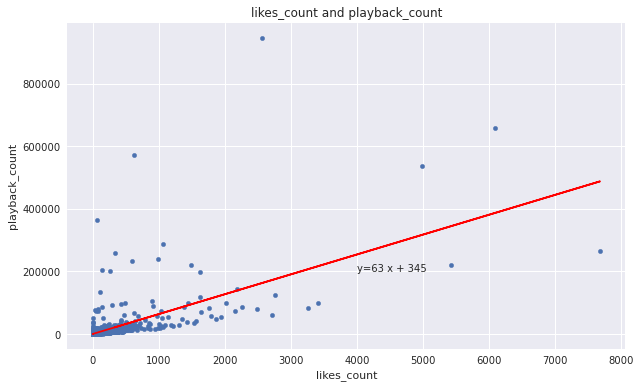

In [45]:
# sns.scatterplot(x="playback_count",y="likes_count",data=track_df_likes_playback)
track_df_likes_playback.plot(kind="scatter",x="likes_count",y="playback_count",figsize=(10,6))
plt.title("likes_count and playback_count")
plt.plot(x_lp, fit[0] * x_lp + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(4000, 200000));

Chúng ta sẽ xem thử có bao nhiêu genre nhạc và số lượng gerne đó trong dữ liệu của chúng ta là bao nhiêu bằng hàm value_counts()

In [46]:
track_df['genre'].value_counts()

Techno        301
Electronic    262
House         256
Deep House     81
Ambient        58
             ... 
Ischia          1
TECHNO          1
chill           1
Glitch Hop      1
AENARIA         1
Name: genre, Length: 829, dtype: int64

Bây giờ, hãy xem 5 gerne nhạc là Techno,Electronic,House,Deep House và Ambient có số lượng lượt nghe được phân bố như thế nào bằng boxplot.

In [47]:
# track_df_genre=track_df[]
# track_df_genre.value_counts()
#(["Electronic","Techno","House","Deep House","Ambient"] in track_df['genre'])
track_df_genre=track_df.copy()
track_df_genre.set_index("genre",inplace=True)
five_genre=["Techno","Electronic","House","Deep House","Ambient"]
track_df_genre=track_df_genre.loc[five_genre,["playback_count"]]
track_df_genre=track_df_genre.reset_index()


Text(0.5, 1.0, 'the distribution of playback_count in 5 gerne')

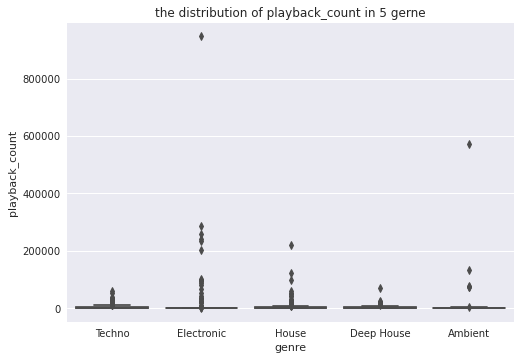

In [48]:
sns.boxplot(x="genre",y="playback_count",data=track_df_genre);
plt.title("the distribution of playback_count in 5 gerne")

Nhìn chung ta có thể thấy là hầu như các track có rất ít lượt nghe. Chỉ 1 số ít trong đó lượt nghe vượt trội và nhìn nó cứ như là outliner. Thế nên ai đang có ý định đăng nhạc lên soundcloud thì hãy chuẩn bị tinh thần số lượt nghe track của mình cũng ít như vậy. :D